In [1]:
import os
import h5py

import numpy as np
import matplotlib.pyplot as plt

from tqdm import tqdm 
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

In [2]:
h5_dir = '/home/r10222035/SPANet2/data/triHiggs'
file_path = os.path.join(h5_dir, 'triHiggs_0b_test.h5')
with h5py.File(file_path, 'r') as f:
    y_test = f['CLASSIFICATIONS/EVENT/signal'][...]
    
file_path = os.path.join(h5_dir, 'triHiggs_0b_test-predict.h5')
with h5py.File(file_path, 'r') as f:
    y_prob = f['CLASSIFICATIONS/EVENT/signal'][...]

100%|██████████| 1001/1001 [00:12<00:00, 82.42it/s]


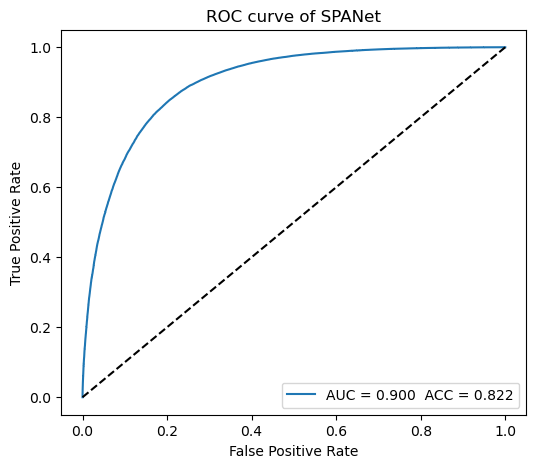

In [3]:
fig, ax = plt.subplots(1,1, figsize=(6,5))

i=1

AUC = roc_auc_score(y_test==i,  y_prob[:,i])
fpr, tpr, thresholds = roc_curve(y_test==i, y_prob[:,i])

accuracy_scores = []
# 最多用 1000 個
if len(thresholds) > 1000:
    thresholds = np.percentile(thresholds, np.linspace(0,100,1001))

for threshold in tqdm(thresholds):
    accuracy_scores.append(accuracy_score(y_test==i,  y_prob[:,i]>threshold))

accuracies = np.array(accuracy_scores)
ACC = accuracies.max() 

ax.plot(fpr, tpr, label = f'AUC = {AUC:.3f}  ACC = {ACC:.3f}')
ax.plot([0, 1], [0, 1], 'k--')

ax.set_title(f'ROC curve of SPANet')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend()

# plt.savefig(f'../figures/ROC_SPANet_triHiggs.pdf', facecolor='White', dpi=300, bbox_inches='tight')
plt.show()